In [78]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [ ]:
df = pd.read_csv("gold_data/Gold Futures Historical Data.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/06/2019,"1,462.50","1,478.20","1,481.50","1,461.00",0.68K,-1.20%
1,12/05/2019,"1,480.30","1,477.60","1,482.70","1,475.90",0.64K,0.19%
2,12/04/2019,"1,477.50","1,480.40","1,487.00","1,474.00",0.88K,-0.28%
3,12/03/2019,"1,481.60","1,465.50","1,484.70","1,462.80",1.40K,1.04%
4,12/02/2019,"1,466.40","1,467.30","1,468.50","1,457.40",1.40K,-0.24%
...,...,...,...,...,...,...,...
4995,02/22/2000,307.70,307.60,309.40,304.20,25.89K,0.13%
4996,02/18/2000,307.30,303.30,307.80,302.00,19.38K,1.15%
4997,02/17/2000,303.80,305.30,312.50,300.00,11.81K,-0.39%
4998,02/16/2000,305.00,304.20,306.00,299.70,56.34K,0.30%


In [ ]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-06-12,"1,462.50","1,478.20","1,481.50","1,461.00",0.68K,-1.20%
1,2019-05-12,"1,480.30","1,477.60","1,482.70","1,475.90",0.64K,0.19%
2,2019-04-12,"1,477.50","1,480.40","1,487.00","1,474.00",0.88K,-0.28%
3,2019-03-12,"1,481.60","1,465.50","1,484.70","1,462.80",1.40K,1.04%
4,2019-02-12,"1,466.40","1,467.30","1,468.50","1,457.40",1.40K,-0.24%
...,...,...,...,...,...,...,...
4995,NaT,307.70,307.60,309.40,304.20,25.89K,0.13%
4996,NaT,307.30,303.30,307.80,302.00,19.38K,1.15%
4997,NaT,303.80,305.30,312.50,300.00,11.81K,-0.39%
4998,NaT,305.00,304.20,306.00,299.70,56.34K,0.30%


In [81]:
df[df["Date"].isna() == True]

,Date,Price,Open,High,Low,Vol.,Change %
5,NaT,"1,470.00","1,459.30","1,470.10","1,456.90",1.63K,-0.18%
6,NaT,"1,472.70","1,461.20","1,472.90","1,459.10",272.34K,1.02%
7,NaT,"1,457.90","1,465.60","1,465.60","1,457.00",4.34K,-0.16%
8,NaT,"1,460.30","1,455.10","1,462.90","1,449.60",346.36K,0.23%
9,NaT,"1,456.90","1,461.00","1,462.00","1,453.90",298.71K,-0.46%
...,...,...,...,...,...,...,...
4995,NaT,307.70,307.60,309.40,304.20,25.89K,0.13%
4996,NaT,307.30,303.30,307.80,302.00,19.38K,1.15%
4997,NaT,303.80,305.30,312.50,300.00,11.81K,-0.39%
4998,NaT,305.00,304.20,306.00,299.70,56.34K,0.30%


In [ ]:
# drop NaT values
df = df[df["Date"].isna() != True].reset_index(drop=True)

In [83]:
df["Change %"] = df["Change %"].str.rstrip("%").astype(float)

In [ ]:
df = df.sort_values(by="Date").reset_index(drop=True)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2000-01-03,293.30,294.20,296.20,292.80,28.15K,-0.31
1,2000-01-05,274.80,274.80,276.10,273.60,16.30K,0.04
2,2000-01-06,275.40,275.40,276.40,274.80,65.97K,0.22
3,2000-01-08,283.20,283.40,284.40,283.20,16.88K,0.00
4,2000-01-09,280.90,281.90,282.10,280.70,13.48K,-0.43
...,...,...,...,...,...,...,...
1969,2019-12-06,"1,333.90","1,327.50","1,338.80","1,326.80",0.61K,0.42
1970,2019-12-07,"1,412.20","1,406.20","1,418.90","1,404.50",284.97K,0.39
1971,2019-12-08,"1,507.70","1,499.10","1,519.30","1,488.80",3.57K,0.61
1972,2019-12-09,"1,500.80","1,499.10","1,525.40","1,490.50",6.91K,0.28


In [ ]:
# split with 80:20

train = df[0 : int(len(df) * 0.80)]
test = df[int(len(df) * 0.80) : int(len(df))]

print(train.shape)
print(test.shape)

(1579, 7)
(395, 7)


In [86]:
train

,Date,Price,Open,High,Low,Vol.,Change %
0,2000-01-03,293.30,294.20,296.20,292.80,28.15K,-0.31
1,2000-01-05,274.80,274.80,276.10,273.60,16.30K,0.04
2,2000-01-06,275.40,275.40,276.40,274.80,65.97K,0.22
3,2000-01-08,283.20,283.40,284.40,283.20,16.88K,0.00
4,2000-01-09,280.90,281.90,282.10,280.70,13.48K,-0.43
...,...,...,...,...,...,...,...
1574,2016-01-03,"1,230.80","1,238.90","1,249.30","1,227.70",225.61K,-0.29
1575,2016-01-04,"1,223.50","1,234.10","1,237.20","1,210.30",196.90K,-0.98
1576,2016-01-06,"1,214.70","1,217.90","1,222.90","1,208.20",159.62K,-0.23
1577,2016-01-07,"1,339.00","1,324.80","1,347.00","1,323.10",223.73K,1.39


In [87]:
test

,Date,Price,Open,High,Low,Vol.,Change %
1579,2016-01-09,"1,317.10","1,311.70","1,318.60","1,305.50",179.60K,0.43
1580,2016-01-11,"1,288.00","1,277.80","1,292.90","1,276.30",207.26K,1.17
1581,2016-01-12,"1,169.40","1,175.10","1,178.40","1,162.20",230.28K,-0.38
1582,2016-02-02,"1,127.20","1,128.50","1,131.50","1,122.60",117.73K,-0.07
1583,2016-02-03,"1,241.80","1,232.30","1,244.80","1,225.10",182.78K,0.89
...,...,...,...,...,...,...,...
1969,2019-12-06,"1,333.90","1,327.50","1,338.80","1,326.80",0.61K,0.42
1970,2019-12-07,"1,412.20","1,406.20","1,418.90","1,404.50",284.97K,0.39
1971,2019-12-08,"1,507.70","1,499.10","1,519.30","1,488.80",3.57K,0.61
1972,2019-12-09,"1,500.80","1,499.10","1,525.40","1,490.50",6.91K,0.28


In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [89]:
train.iloc[:, 6:7].values

array([[-0.31],
       [ 0.04],
       [ 0.22],
       ...,
       [-0.23],
       [ 1.39],
       [ 0.15]])

In [90]:
train_perc_change = train.iloc[:, 6:7].values
test_perc_change = test.iloc[:, 6:7].values

In [91]:
train_perc_change

array([[-0.31],
       [ 0.04],
       [ 0.22],
       ...,
       [-0.23],
       [ 1.39],
       [ 0.15]])

In [92]:
data_training_array = scaler.fit_transform(train_perc_change)
data_training_array

array([[-0.29306924],
       [ 0.01159333],
       [ 0.16827694],
       ...,
       [-0.22343208],
       [ 1.1867204 ],
       [ 0.10734443]])

In [ ]:
# window period
x_train = []
y_train = []

window_size = 5
for i in range(window_size, data_training_array.shape[0]):
    x_train.append(data_training_array[i - window_size : i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [94]:
x_train.shape

(1574, 5, 1)

# LSTM MODEL

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import SGD, Adam, Adadelta
from tensorflow.keras import backend as K
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import RandomizedSearchCV


def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


optimizer_map = {"sgd": SGD, "adam": Adam, "adadelta": Adadelta}

loss_map = {"mse": "mean_squared_error", "mae": "mean_absolute_error", "rmse": rmse}


# Custom Keras Model Wrapper
class KerasModelWrapper(BaseEstimator, RegressorMixin):
    def __init__(
        self,
        units=64,
        num_layers=2,
        dropout=0.3,
        optimizer="adam",
        loss="mse",
        learning_rate=0.001,
        epochs=50,
    ):
        self.units = units
        self.num_layers = num_layers
        self.dropout = dropout
        self.optimizer = optimizer
        self.loss = loss
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.model = None

    def build_model(self):
        model = Sequential()
        for i in range(self.num_layers):
            return_seq = i < self.num_layers - 1
            model.add(
                LSTM(
                    units=self.units,
                    activation="relu",
                    return_sequences=return_seq,
                    input_shape=(self.X_train.shape[1], 1) if i == 0 else None,
                )
            )
            model.add(Dropout(self.dropout))
        model.add(Dense(1))
        model.compile(
            optimizer=optimizer_map[self.optimizer](learning_rate=self.learning_rate),
            loss=loss_map[self.loss],
            metrics=["mae"],
        )
        return model

    def fit(self, X, y):
        # train model
        self.X_train = X
        self.y_train = y
        self.model = self.build_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        # make predictions
        return self.model.predict(X)

    def score(self, X, y):
        # negative loss
        return -self.model.evaluate(X, y, verbose=0)[0]


param_dist = {
    "units": [32, 64, 128],
    "num_layers": [2, 4, 6],
    "dropout": [0.2, 0.3, 0.5],
    "optimizer": ["sgd", "adam", "adadelta"],
    "loss": ["mse", "mae", "rmse"],
    "learning_rate": [0.001, 0.0001],
    "epochs": [20, 50],
}

model = KerasModelWrapper()

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # -> 10 random combination
    cv=3,  # -> 3 fold cross validation
    verbose=2,
    random_state=42,
    n_jobs=-1,  # -> 1 job in parallel
)

random_search.fit(x_train, y_train)

print("Best Parameters:\n", random_search.best_params_)
print("Best Score (MAE):", -random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/visheshgupta/miniforge3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/visheshgupta/miniforge3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/visheshgupta/miniforge3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/visheshgupta/miniforge3/lib/python3.12/site-packages/keras/src/layers/rnn/r

[CV] END dropout=0.2, epochs=20, learning_rate=0.001, loss=rmse, num_layers=4, optimizer=adadelta, units=64; total time=   9.2s
[CV] END dropout=0.2, epochs=20, learning_rate=0.001, loss=rmse, num_layers=4, optimizer=adadelta, units=64; total time=   9.2s
[CV] END dropout=0.2, epochs=20, learning_rate=0.001, loss=rmse, num_layers=4, optimizer=adadelta, units=64; total time=   9.4s
[CV] END dropout=0.5, epochs=20, learning_rate=0.0001, loss=mae, num_layers=4, optimizer=sgd, units=128; total time=  21.0s
[CV] END dropout=0.5, epochs=50, learning_rate=0.001, loss=mae, num_layers=6, optimizer=sgd, units=32; total time=  21.1s
[CV] END dropout=0.5, epochs=20, learning_rate=0.0001, loss=mae, num_layers=4, optimizer=sgd, units=128; total time=  21.2s
[CV] END dropout=0.5, epochs=20, learning_rate=0.0001, loss=mae, num_layers=4, optimizer=sgd, units=128; total time=  21.4s
[CV] END dropout=0.5, epochs=50, learning_rate=0.001, loss=mae, num_layers=6, optimizer=sgd, units=32; total time=  21.5s


/Users/visheshgupta/miniforge3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best Parameters:
 {'units': 64, 'optimizer': 'adadelta', 'num_layers': 2, 'loss': 'mae', 'learning_rate': 0.0001, 'epochs': 50, 'dropout': 0.2}
Best Score (MAE): 0.7364402612050375


In [96]:
best_model = random_search.best_estimator_
best_model

KerasModelWrapper(dropout=0.2, learning_rate=0.0001, loss='mae',
                  optimizer='adadelta')

In [ ]:
# import numpy as np
# from tensorflow.keras.layers import Dense, Dropout, LSTM
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.optimizers import Adam
# from sklearn.model_selection import RandomizedSearchCV

# def build_model(units=50, num_layers=1, dropout=0.2, learning_rate=0.001):
#     model = Sequential()
#     for i in range(num_layers):
#         return_seq = i < num_layers - 1
#         model.add(LSTM(units=units, activation='relu', return_sequences=return_seq,
#                        input_shape=(x_train.shape[1], 1) if i == 0 else None))
#         model.add(Dropout(dropout))

#     model.add(Dense(units=1))
#     model.compile(optimizer=Adam(learning_rate=learning_rate),
#                   loss='mean_squared_error',
#                   metrics=['mae'])

#     return model

# param_dist = {
#     "units": [50, 100, 150],
#     "num_layers": [1, 2],
#     "dropout": [0.2, 0.3, 0.5],
#     "learning_rate": [0.001, 0.0001],
#     "epochs": [20, 50],
#     "batch_size": [16, 32]
# }

In [98]:
# from tqdm import tqdm

In [ ]:
# best_model = None
# best_score = np.inf
# best_params = None

# # Loop through all combinations of hyperparameters manually
# for units in tqdm(param_dist["units"]):
#     for num_layers in param_dist["num_layers"]:
#         for dropout in param_dist["dropout"]:
#             for learning_rate in param_dist["learning_rate"]:
#                 for epochs in param_dist["epochs"]:
#                     for batch_size in param_dist["batch_size"]:
#                         print(f"Training with units={units}, layers={num_layers}, dropout={dropout}, "
#                               f"learning_rate={learning_rate}, epochs={epochs}, batch_size={batch_size}")

#                         model = build_model(units=units, num_layers=num_layers, dropout=dropout, learning_rate=learning_rate)
#                         history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

#                         val_loss = history.history['loss'][-1]

#                         if val_loss < best_score:
#                             best_score = val_loss
#                             best_model = model
#                             best_params = {
#                                 "units": units,
#                                 "num_layers": num_layers,
#                                 "dropout": dropout,
#                                 "learning_rate": learning_rate,
#                                 "epochs": epochs,
#                                 "batch_size": batch_size
#                             }

# print(f"Best Model: {best_params}")

In [ ]:
# in testing for the first column we will need window day values from training
past_window_period = train_perc_change[-window_size:]

In [101]:
test_perc_change

array([[ 0.43],
       [ 1.17],
       [-0.38],
       [-0.07],
       [ 0.89],
       [ 0.41],
       [-0.17],
       [ 0.96],
       [ 0.73],
       [ 1.57],
       [ 0.72],
       [ 1.25],
       [ 1.32],
       [-0.31],
       [ 2.5 ],
       [-0.58],
       [-0.33],
       [-0.37],
       [ 1.41],
       [ 1.42],
       [ 0.99],
       [-0.34],
       [-1.35],
       [ 1.47],
       [ 0.2 ],
       [-3.28],
       [ 0.09],
       [ 0.3 ],
       [ 0.02],
       [ 0.84],
       [-0.16],
       [-1.68],
       [ 2.06],
       [-0.09],
       [-0.11],
       [ 1.25],
       [-0.47],
       [ 1.71],
       [ 0.36],
       [ 0.62],
       [-1.23],
       [-0.54],
       [ 1.46],
       [-0.53],
       [ 1.12],
       [-0.03],
       [-0.37],
       [-0.35],
       [-0.09],
       [-1.92],
       [ 0.63],
       [-0.89],
       [ 3.47],
       [-0.09],
       [ 0.51],
       [ 1.23],
       [-0.27],
       [-0.23],
       [-0.56],
       [-0.38],
       [-0.43],
       [ 0.06],
       [

In [102]:
past_window_period

array([[-0.29],
       [-0.98],
       [-0.23],
       [ 1.39],
       [ 0.15]])

In [103]:
# append to test data
final_array = np.concatenate((past_window_period, test_perc_change), axis=0)
final_array

array([[-0.29],
       [-0.98],
       [-0.23],
       [ 1.39],
       [ 0.15],
       [ 0.43],
       [ 1.17],
       [-0.38],
       [-0.07],
       [ 0.89],
       [ 0.41],
       [-0.17],
       [ 0.96],
       [ 0.73],
       [ 1.57],
       [ 0.72],
       [ 1.25],
       [ 1.32],
       [-0.31],
       [ 2.5 ],
       [-0.58],
       [-0.33],
       [-0.37],
       [ 1.41],
       [ 1.42],
       [ 0.99],
       [-0.34],
       [-1.35],
       [ 1.47],
       [ 0.2 ],
       [-3.28],
       [ 0.09],
       [ 0.3 ],
       [ 0.02],
       [ 0.84],
       [-0.16],
       [-1.68],
       [ 2.06],
       [-0.09],
       [-0.11],
       [ 1.25],
       [-0.47],
       [ 1.71],
       [ 0.36],
       [ 0.62],
       [-1.23],
       [-0.54],
       [ 1.46],
       [-0.53],
       [ 1.12],
       [-0.03],
       [-0.37],
       [-0.35],
       [-0.09],
       [-1.92],
       [ 0.63],
       [-0.89],
       [ 3.47],
       [-0.09],
       [ 0.51],
       [ 1.23],
       [-0.27],
       [

In [104]:
len(final_array)

400

In [105]:
# scale this as above
input_data = scaler.fit_transform(final_array)
input_data

array([[-3.92333607e-01],
       [-1.22076353e+00],
       [-3.20296222e-01],
       [ 1.62471317e+00],
       [ 1.35940548e-01],
       [ 4.72115010e-01],
       [ 1.36057609e+00],
       [-5.00389684e-01],
       [-1.28196529e-01],
       [ 1.02440163e+00],
       [ 4.48102549e-01],
       [-2.48258837e-01],
       [ 1.10844524e+00],
       [ 8.32301934e-01],
       [ 1.84082532e+00],
       [ 8.20295703e-01],
       [ 1.45662594e+00],
       [ 1.54066955e+00],
       [-4.16346068e-01],
       [ 2.95740478e+00],
       [-7.40514300e-01],
       [-4.40358530e-01],
       [-4.88383453e-01],
       [ 1.64872563e+00],
       [ 1.66073186e+00],
       [ 1.14446393e+00],
       [-4.52364761e-01],
       [-1.66499407e+00],
       [ 1.72076301e+00],
       [ 1.95971702e-01],
       [-3.98219661e+00],
       [ 6.39031634e-02],
       [ 3.16034010e-01],
       [-2.01404522e-02],
       [ 9.64370473e-01],
       [-2.36252606e-01],
       [-2.06119969e+00],
       [ 2.42913063e+00],
       [-1.5

In [ ]:
# model test
x_test = []
y_test = []
for i in range(window_size, input_data.shape[0]):
    x_test.append(input_data[i - window_size : i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [107]:
y_pred = best_model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
# inverse your results from scalar for both test and pred results

y_test_reshaped = y_test.reshape(-1, 1)
y_test_original = scaler.inverse_transform(y_test_reshaped)

y_pred_reshaped = y_pred.reshape(-1, 1)
y_pred_original = scaler.inverse_transform(y_pred_reshaped)

In [109]:
min(y_pred)

array([0.00159815], dtype=float32)

In [110]:
max(y_pred)

array([0.02905634], dtype=float32)

In [111]:
min(y_test)

-4.030221536307934

In [112]:
max(y_test)

5.29861978821118

In [113]:
y_pred_original

array([[0.04398203],
       [0.04291686],
       [0.0425322 ],
       [0.04287475],
       [0.04098599],
       [0.04183825],
       [0.04163386],
       [0.04073815],
       [0.04132202],
       [0.04233495],
       [0.04395509],
       [0.04493183],
       [0.0467074 ],
       [0.04744862],
       [0.04624745],
       [0.0473736 ],
       [0.04760041],
       [0.04576876],
       [0.04373169],
       [0.04461353],
       [0.04533228],
       [0.04556852],
       [0.04510651],
       [0.04497275],
       [0.04488048],
       [0.04415831],
       [0.05241023],
       [0.05475311],
       [0.05176167],
       [0.05335277],
       [0.05270862],
       [0.03972542],
       [0.04330431],
       [0.04517188],
       [0.04600294],
       [0.04555747],
       [0.04620838],
       [0.04389559],
       [0.04324059],
       [0.04362456],
       [0.04352235],
       [0.04280538],
       [0.04290524],
       [0.04439722],
       [0.04537103],
       [0.04655069],
       [0.04352106],
       [0.042

In [114]:
y_test_original

array([[ 0.43],
       [ 1.17],
       [-0.38],
       [-0.07],
       [ 0.89],
       [ 0.41],
       [-0.17],
       [ 0.96],
       [ 0.73],
       [ 1.57],
       [ 0.72],
       [ 1.25],
       [ 1.32],
       [-0.31],
       [ 2.5 ],
       [-0.58],
       [-0.33],
       [-0.37],
       [ 1.41],
       [ 1.42],
       [ 0.99],
       [-0.34],
       [-1.35],
       [ 1.47],
       [ 0.2 ],
       [-3.28],
       [ 0.09],
       [ 0.3 ],
       [ 0.02],
       [ 0.84],
       [-0.16],
       [-1.68],
       [ 2.06],
       [-0.09],
       [-0.11],
       [ 1.25],
       [-0.47],
       [ 1.71],
       [ 0.36],
       [ 0.62],
       [-1.23],
       [-0.54],
       [ 1.46],
       [-0.53],
       [ 1.12],
       [-0.03],
       [-0.37],
       [-0.35],
       [-0.09],
       [-1.92],
       [ 0.63],
       [-0.89],
       [ 3.47],
       [-0.09],
       [ 0.51],
       [ 1.23],
       [-0.27],
       [-0.23],
       [-0.56],
       [-0.38],
       [-0.43],
       [ 0.06],
       [

In [115]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test_original, y_pred_original)
mae_percentage = (mae / np.mean(y_test_original)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

r2 = r2_score(y_test_original, y_pred_original)

print("R2 score:", r2)

Mean absolute error on test set: 1606.26%
R2 score: 8.016626492368673e-05


In [116]:
def directional_accuracy(actual, predicted):
    correct = np.sum(np.sign(actual) == np.sign(predicted))
    return (correct / len(actual)) * 100

In [117]:
lstm_dir_acc = directional_accuracy(y_test_original, y_pred_original)
print("LSTM Directional Accuracy (%):", lstm_dir_acc)

LSTM Directional Accuracy (%): 49.11392405063291


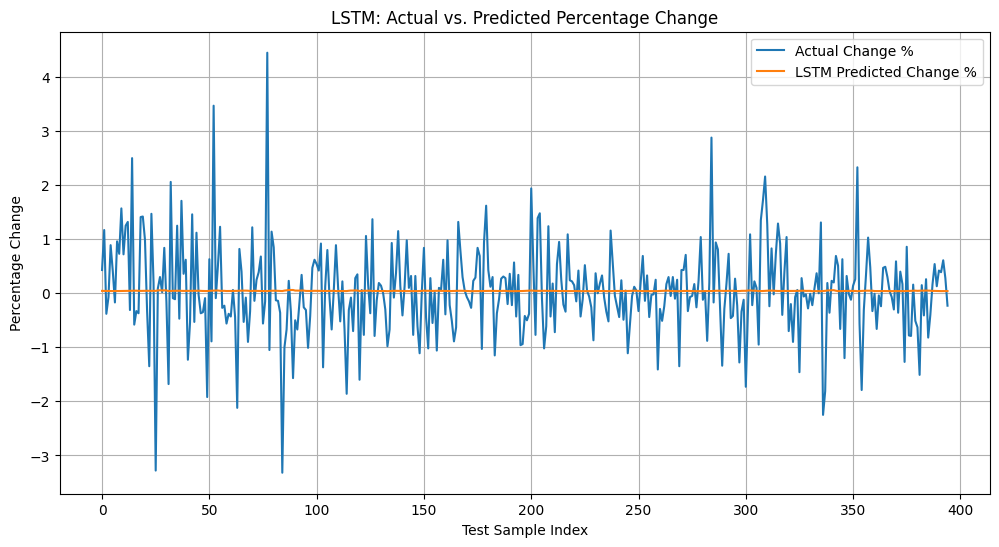

In [118]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label="Actual Change %")
plt.plot(y_pred_original, label="LSTM Predicted Change %")
plt.title("LSTM: Actual vs. Predicted Percentage Change")
plt.xlabel("Test Sample Index")
plt.ylabel("Percentage Change")
plt.legend()
plt.grid(True)
plt.show()